O código abaixo desabilita a funcionalidade de scroll bar nas células _output_.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Read the Data
Os dados apresentados nesta base incluem contratações mensais e estão de acordo com a Instrução Normativa nº 28/1999, art. 2º, inciso XXIV do Tribunal de Contas da União.

In [2]:
from datetime import datetime
import locale
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
locale.setlocale(locale.LC_TIME, 'pt-BR')

# Read the file
# Set the thousands and decimal caracteres
# Create the column 'MESANO' by concatenating the columns MES + ANO
# Keep the columns MES and ANO.
df = pd.read_csv('data.csv', 
                 thousands='.', 
                 decimal=',', 
                 parse_dates={'MESANO': ['MES', 'ANO']}, 
                 keep_date_col=True, 
                 infer_datetime_format=True)

# Quais são os Departamentos que atuam na Prefeitura?
O objetivo desta seção é apresentar a divisão dos Departamentos da Prefeitura.

In [3]:
print(df['UNIDADE'].unique())

['DEPARTAMENTO MUNICIPAL DE ESPORTE E LAZER'
 'DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. PUBL.'
 'DEPARTAMENTO MUNICIPAL DE ASSISTENCIA SOCIAL' 'GABINETE DO PREFEITO'
 'DEPARTAMENTO MUNICIPAL DE EDUCACAO' 'DEPARTAMENTO MUNICIPAL DE SAUDE'
 'DEPARTAMENTO MUNICIPAL DE ADMINISTRACAO'
 'DEPTO. MUNICIPAL DE AGRICULTURA E GESTAO AMBIENTAL'
 'DEPTO. MUN. INDUSTRIA, COMERCIO, TURISMO E CULTURA'
 'DEPARTAMENTO DE LICITACOES, CONTRATOS E COMPRAS'
 'DEPARTAMENTO MUNICIPAL DE FINANCAS']


# Qual o valor total mensal de compras?
Em outra palavras, quanto a prefeitura compra por mês?

In [4]:
valor_mensal = df.groupby('MESANO')['VR . TOTAL'].sum()
valor_mensal

MESANO
2017-09-01    183226.13
2017-10-01    120909.10
2017-11-01    224760.14
2017-12-01    105002.51
2018-01-01    120050.65
2018-02-01    899029.99
2018-03-01    398146.35
2018-04-01    207518.04
2018-05-01    230010.03
2018-06-01    145773.99
2018-07-01    166940.99
2018-08-01    277789.09
2018-09-01    173616.89
2018-10-01    115354.60
2018-11-01    184009.18
2018-12-01     96959.50
2019-01-01     46072.07
2019-02-01    215087.40
2019-03-01    400789.80
Name: VR . TOTAL, dtype: float64

## Visualização dos valores
Analise, no gráfico, os valores de compras pela prefeitura mês-a-mês.

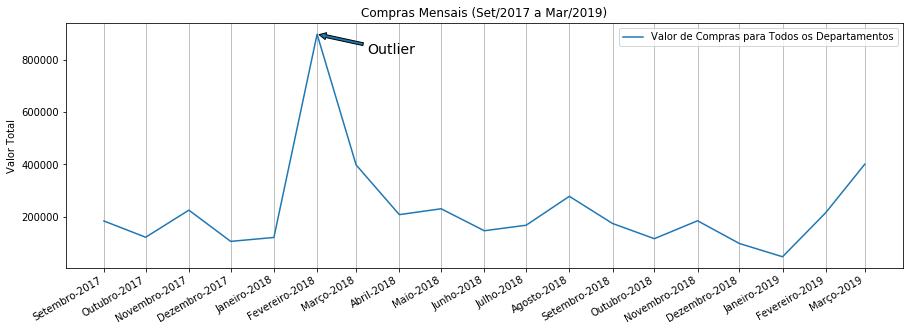

In [5]:
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(15, 5))

ax.xaxis.grid()

ax.plot(valor_mensal.index, valor_mensal,  label='Valor de Compras para Todos os Departamentos')
ax.set_title('Compras Mensais (Set/2017 a Mar/2019)')
ax.set_ylabel('Valor Total')
ax.legend()

# Set the Outlier arrow
ax.annotate('Outlier', 
            fontsize=14,
            xy=(mdates.date2num(valor_mensal.idxmax()), valor_mensal.max()),  
            textcoords='offset points',
            xytext=(50, -20), 
            arrowprops=dict(arrowstyle='simple'))

# Set the labels on the x axis
plt.xticks(valor_mensal.index, [label.strftime('%B-%Y').capitalize() for label in valor_mensal.index])

# Rotate the text on the x axis
fig.autofmt_xdate()

# Descobrindo o _Outlier_

É possível observar que em um determinado momento no gráfico há um pico no eixo de _Valor Total_, indicando que o valor de compras naquele mês foi superior em relação aos demais. Portanto, naquele mês a Prefeitura realizou uma compra extraordinária.

Vamos analisar este período mais de perto...

## Em qual mês houve o maior valor de compra?
Descubra em qual mês ocorreu o _outlier_.

In [6]:
valor_mensal.idxmax().strftime('%B-%Y')

'fevereiro-2018'

## Quais Departamentos compraram no mês de Fevereiro/2018?
Analise quais Departamentos realizaram compras no mês de Fevereiro/2018 e quanto cada Departamento comprou.

In [7]:
# Define um sub data set
df_fevereiro = df[df['MESANO'] == '2018-02-01'].groupby('UNIDADE')['VR . TOTAL'].sum()
df_fevereiro

UNIDADE
DEPARTAMENTO MUNICIPAL DE ADMINISTRACAO                 9104.46
DEPARTAMENTO MUNICIPAL DE ASSISTENCIA SOCIAL            9476.33
DEPARTAMENTO MUNICIPAL DE EDUCACAO                     47060.73
DEPARTAMENTO MUNICIPAL DE ESPORTE E LAZER               3812.00
DEPARTAMENTO MUNICIPAL DE FINANCAS                      1004.00
DEPARTAMENTO MUNICIPAL DE SAUDE                        67082.54
DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. PUBL.    724351.07
DEPTO. MUNICIPAL DE AGRICULTURA E GESTAO AMBIENTAL     35966.88
GABINETE DO PREFEITO                                    1171.98
Name: VR . TOTAL, dtype: float64

## Visualização dos valores
Analise, no gráfico, os valores de compras de cada Departamento no mês de Fevereiro/2018.

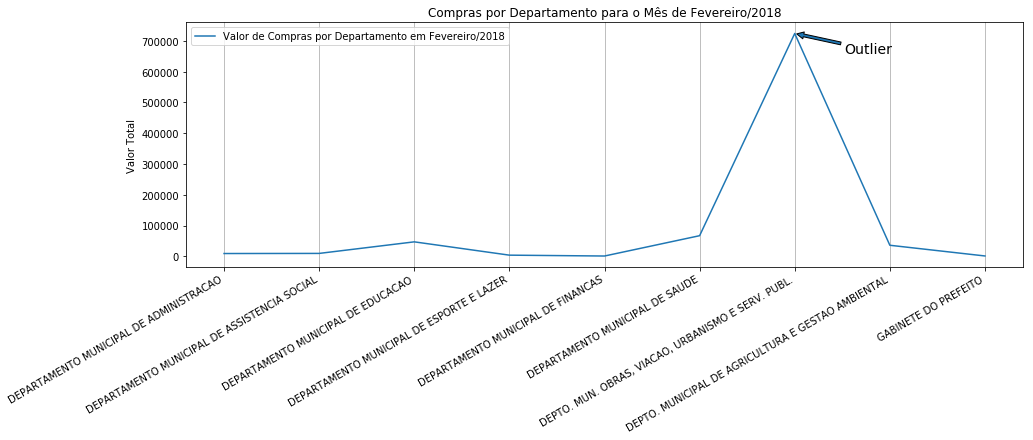

In [8]:
# Cria o gráfico
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_fevereiro.index, df_fevereiro,  label='Valor de Compras por Departamento em Fevereiro/2018')
ax.set_title('Compras por Departamento para o Mês de Fevereiro/2018')
ax.set_ylabel('Valor Total')
ax.legend()
ax.xaxis.grid()

# Set the Outlier arrow
ax.annotate('Outlier', 
            fontsize=14,
            xy=(df_fevereiro.idxmax(), df_fevereiro.max()),  
            textcoords='offset points',
            xytext=(50, -20), 
            arrowprops=dict(arrowstyle='simple'))

# Rotate the text on the x axis
fig.autofmt_xdate()

plt.show()

## Quais itens foram comprados pelo Deparmento de Obras em Fevereiro/2018?
Nesta seção é esclarecido o porquê do Departamento de Obras, Viação, Urbanismo e Serviços Públicos apresentar um valor elevado no mês de Fevereiro/2018.

Analise os itens com os maiores valores de compras no mês de Fevereiro/2018 e entenda o porquê dos _Outliers_ apresentados nos gráficos.

Concluímos que em __Fevereiro/2018__, o __Departamento de Obras, Viação, Urbanismo e Serviços Públicos__ adquiriu:
- 02 Caminhões com Caçamba no valor total de R$ 448.000,00

- 01 Caminhão Compactador de Lixo no valor total de R$ 240.000,00.

In [9]:
# Define um filtro para o Departamento de Obras no mês de Fevereiro/2018
df_obras_fevereiro = df[
    (df['UNIDADE'] == 'DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. PUBL.') 
    & 
    (df['MESANO'] == '2018-02-01')
]

df_obras_fevereiro.sort_values(by='VR . TOTAL', ascending=False).head(2)

,MESANO,UNIDADE,NOME DO FORNECEDOR,CNPJ,COMPRA No,DESCRIÇÃO DO BEM,UNIDADE.1,PREÇO UNIT .,QUANTIDADE,VR . TOTAL,MES,ANO
7446,2018-02-01,"DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. P...",DEVA VEICULOS LTDA (BETIM),23.762.552/0003-02,40718,CAMINHAO TOCO COM CACAMBA,UN,224000.0,2.0,448000.0,2,2018
7447,2018-02-01,"DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. P...",DEVA VEICULOS LTDA (BETIM),23.762.552/0003-02,40718,CAMINHAO TOCO COMPACTADOR LIXO,UN,240000.0,1.0,240000.0,2,2018


# Qual a Porcentagem de Compras por Departamento?
Descubra a porcentagem de compras por departamento.

In [10]:
df_unidade = df.groupby('UNIDADE')['VR . TOTAL'].sum()
df_unidade_porcentagem = (df_unidade / df_unidade.sum() * 100).sort_values(ascending=False)
df_unidade_porcentagem

UNIDADE
DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. PUBL.    34.121037
DEPARTAMENTO MUNICIPAL DE SAUDE                       25.645909
DEPARTAMENTO MUNICIPAL DE EDUCACAO                    15.890782
DEPTO. MUNICIPAL DE AGRICULTURA E GESTAO AMBIENTAL    10.462471
DEPARTAMENTO MUNICIPAL DE ADMINISTRACAO                4.641576
DEPARTAMENTO MUNICIPAL DE ASSISTENCIA SOCIAL           3.892480
GABINETE DO PREFEITO                                   2.823694
DEPARTAMENTO MUNICIPAL DE ESPORTE E LAZER              1.163618
DEPTO. MUN. INDUSTRIA, COMERCIO, TURISMO E CULTURA     0.879424
DEPARTAMENTO MUNICIPAL DE FINANCAS                     0.376066
DEPARTAMENTO DE LICITACOES, CONTRATOS E COMPRAS        0.102944
Name: VR . TOTAL, dtype: float64

## Visualização dos valores
Analise, no gráfico, a porcentagem de compras por departamento. Quais são os três departamentos que mais recebem investimentos?

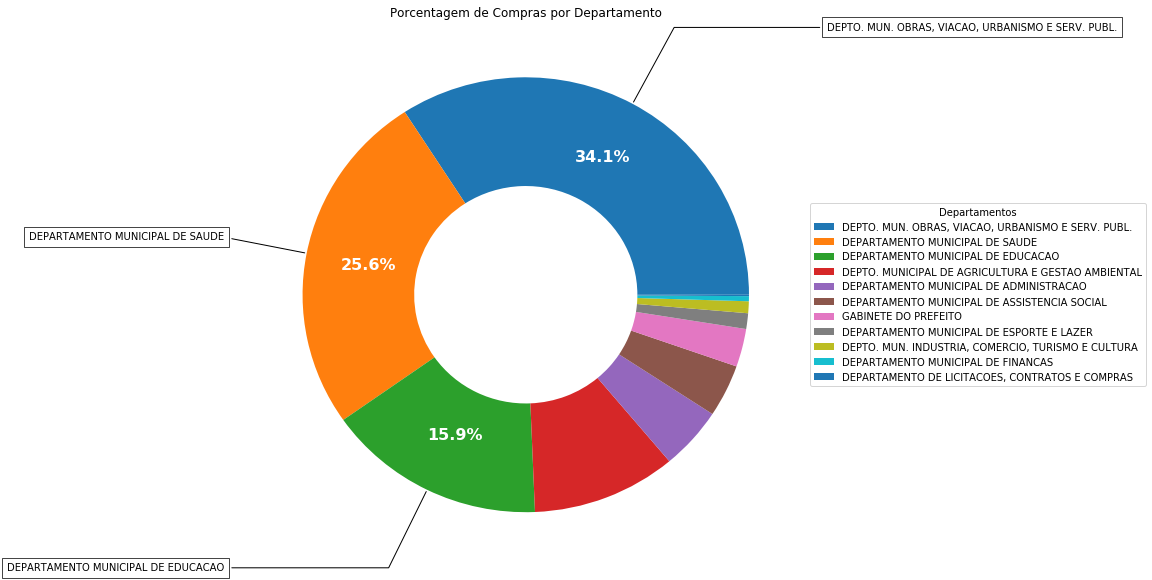

In [11]:
import numpy as np


def get_top_three(df, value):
    '''
        Return the top three values
    '''
    top_three = round(df.nlargest(3), 1)

    if round(value, 1) in top_three.values:
        return True
    
    return False


# Create the Pie
# Source: https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Porcentagem de Compras por Departamento')

wedges, texts, autotexts = ax.pie(
    df_unidade_porcentagem, 
    wedgeprops=dict(width=0.5), 
    pctdistance=0.72,
    autopct=lambda value: '%1.1f%%' % value if get_top_three(df_unidade_porcentagem, value) else ''
)


# Create the legends
bbox_props = dict(
    boxstyle="square, pad=0.5", 
    fc="w", 
    ec="k", 
    lw=0.72
)

kw = dict(xycoords='data', 
          textcoords='data', 
          arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, 
          zorder=0, 
          va="center"
)

for i, p in enumerate(wedges):
    # Stop looping if the value is not in the top three
    if not get_top_three(df_unidade_porcentagem, df_unidade_porcentagem[i]):
        break
        
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(df_unidade_porcentagem.index[i], 
                xy=(x, y), 
                xytext=(1.35*np.sign(x), 1.4*y), 
                horizontalalignment=horizontalalignment, 
                **kw)

# Define the style for the percentage
plt.setp(autotexts, size=16, color='white', weight="bold")
    
# Alternative legends
ax.legend(wedges, 
          df_unidade_porcentagem.index, 
          title="Departamentos",
          loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

## Interpretação das Porcentagens
Analisando todas as compras mensais realizadas pela prefeitura, verificamos que os 3 Departamentos que mais recebem investimentos são:
- DEPTO. MUN. OBRAS, VIACAO, URBANISMO E SERV. PUBL.
- DEPARTAMENTO MUNICIPAL DE SAUDE
- DEPARTAMENTO MUNICIPAL DE EDUCACAO

Nós já sabemos que o Departamento de Obras comprou 03 caminhões no mês de Fevereiro/2018.<br>
Agora vamos analisar mais de perto os demais Departamentos e responder as seguintes perguntas:

- Em qual período os Departamentos de Saúde e Educação receberam mais investimentos?
- Quais são os itens mais caros?

### Em qual período os Departamentos de Saúde e Educação receberam mais investimentos?

#### Departamento de Saúde
Em __Novembro/2018__ o Departamento de Saúde fez o maior valor de compras.

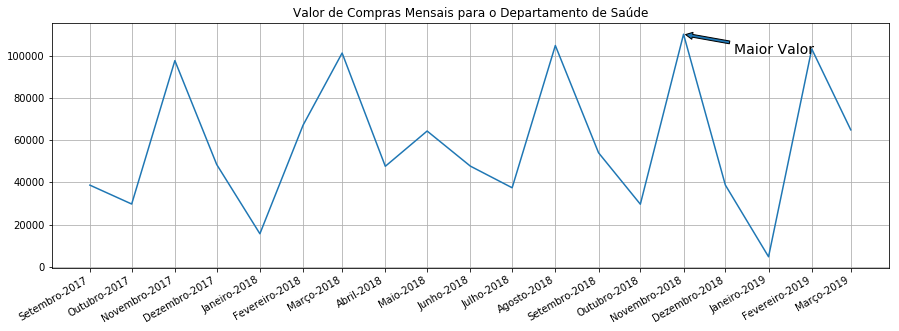

In [12]:
df_saude_mensal = df[df['UNIDADE'] == 'DEPARTAMENTO MUNICIPAL DE SAUDE'].groupby('MESANO')['VR . TOTAL'].sum()

fix, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_saude_mensal.index, df_saude_mensal)

ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Valor de Compras Mensais para o Departamento de Saúde')

# Set the Outlier arrow
ax.annotate('Maior Valor', 
            fontsize=14,
            xy=(df_saude_mensal.idxmax(), df_saude_mensal.max()),  
            textcoords='offset points',
            xytext=(50, -20), 
            arrowprops=dict(arrowstyle='simple'))

# Set the labels on the x axis
plt.xticks(df_saude_mensal.index, [label.strftime('%B-%Y').capitalize() for label in df_saude_mensal.index])

fix.autofmt_xdate()

#### Departamento de Educação
Em __Abril/2018__ o Departamento de Educação fez o maior valor de compras.

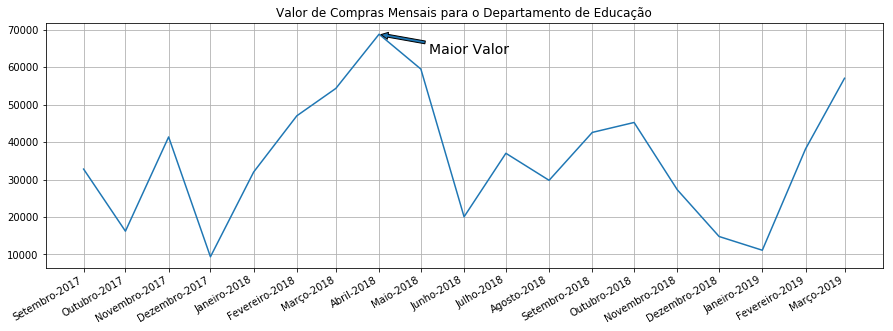

In [13]:
df_educacao_mensal = df[df['UNIDADE'] == 'DEPARTAMENTO MUNICIPAL DE EDUCACAO'].groupby('MESANO')['VR . TOTAL'].sum()

fix, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_educacao_mensal.index, df_educacao_mensal)

ax.yaxis.grid()
ax.xaxis.grid()
ax.set_title('Valor de Compras Mensais para o Departamento de Educação')

# Set the Outlier arrow
ax.annotate('Maior Valor', 
            fontsize=14,
            xy=(df_educacao_mensal.idxmax(), df_educacao_mensal.max()),  
            textcoords='offset points',
            xytext=(50, -20), 
            arrowprops=dict(arrowstyle='simple'))

# Set the labels on the x axis
plt.xticks(df_educacao_mensal.index, [label.strftime('%B-%Y').capitalize() for label in df_educacao_mensal.index])

fix.autofmt_xdate()

#### Departamento de Saúde x Departamento de Educação
Analise, no gráfico, a relação de compras mensais entre os Departamentos de Saúde e Educação.

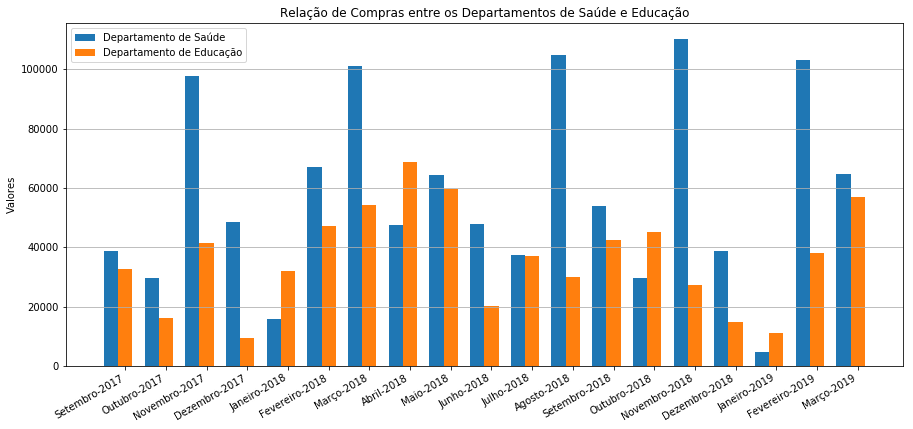

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))

bar_width = 0.35
index = np.arange(len(df_saude_mensal))

# Create the bars
bar_saude = ax.bar(index, df_saude_mensal, bar_width, label='Departamento de Saúde')
bar_educacao = ax.bar(index + bar_width, df_educacao_mensal, bar_width, label='Departamento de Educação')
ax.yaxis.grid()

# Set the info
plt.ylabel('Valores')
plt.title('Relação de Compras entre os Departamentos de Saúde e Educação')
plt.xticks(index + bar_width, [label.strftime('%B-%Y').capitalize() for label in df_saude_mensal.index])
plt.legend()

# Rotate the labels on the x axis
fig.autofmt_xdate()

ax.legend()

### Quais são os itens mais caros?

#### Departamento de Saúde
É evidente que os maiores gastos do Departamento de Saúde estão relacionados ao __combustível__: em __transporte de pacientes para cidades vizinhas__.

In [15]:
df[df['UNIDADE'] == 'DEPARTAMENTO MUNICIPAL DE SAUDE'].sort_values(by=['VR . TOTAL', 'MESANO'], ascending=False).head(20)

,MESANO,UNIDADE,NOME DO FORNECEDOR,CNPJ,COMPRA No,DESCRIÇÃO DO BEM,UNIDADE.1,PREÇO UNIT .,QUANTIDADE,VR . TOTAL,MES,ANO
6929,2017-12-01,DEPARTAMENTO MUNICIPAL DE SAUDE,VIA MONDO AUTOMOVEIS E PECAS LTDA.,00.836.942/0001-04,388817,"VEICULO 05 LUGARES, 04 PORTAS",UN,42051.28,0.39,16400.00,12,2017
1696,2018-09-01,DEPARTAMENTO MUNICIPAL DE SAUDE,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,282618,GASOLINA COMUM OU ADITIVADA,LT,4.43,3518.77,15588.15,9,2018
7371,2018-02-01,DEPARTAMENTO MUNICIPAL DE SAUDE,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,34518,GASOLINA COMUM OU ADITIVADA,LT,3.99,3756.71,14989.28,2,2018
1188,2018-08-01,DEPARTAMENTO MUNICIPAL DE SAUDE,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,257018,GASOLINA COMUM OU ADITIVADA,LT,4.43,3208.43,14213.35,8,2018
6928,2017-12-01,DEPARTAMENTO MUNICIPAL DE SAUDE,VIA MONDO AUTOMOVEIS E PECAS LTDA.,00.836.942/0001-04,388717,"VEICULO 05 LUGARES, 04 PORTAS",UN,42187.50,0.32,13500.00,12,2017
8804,2018-04-01,DEPARTAMENTO MUNICIPAL DE SAUDE,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,104318,GASOLINA COMUM OU ADITIVADA,LT,4.19,3221.84,13499.52,4,2018
3761,2019-02-01,DEPARTAMENTO MUNICIPAL DE SAUDE,MED CENTER COMERCIAL LTDA.,00.874.929/0001-40,33219,DIOSMINA + HESPERIDINA 450MG/,CO,0.34,36000.00,12240.00,2,2019
6927,2017-12-01,DEPARTAMENTO MUNICIPAL DE SAUDE,VIA MONDO AUTOMOVEIS E PECAS LTDA.,00.836.942/0001-04,388617,"VEICULO 05 LUGARES, 04 PORTAS",UN,41379.31,0.29,12000.00,12,2017
4219,2019-03-01,DEPARTAMENTO MUNICIPAL DE SAUDE,POSTO DOM PEDRO INCONFIDENTES URBANO LTDA,08.284.434/0001-72,53519,GASOLINA COMUM OU ADITIVADA,LT,4.30,2623.21,11279.79,3,2019
3592,2019-02-01,DEPARTAMENTO MUNICIPAL DE SAUDE,POSTO DOM PEDRO INCONFIDENTES URBANO LTDA,08.284.434/0001-72,22719,GASOLINA COMUM OU ADITIVADA,LT,4.30,2529.96,10878.83,2,2019


#### Departamento de Educação
Também está evidente que os maiores gastos do Departamento de Educação estão relacionados aos __veículos__: em __manutenção do transporte escolar__.

In [16]:
df[df['UNIDADE'] == 'DEPARTAMENTO MUNICIPAL DE EDUCACAO'].sort_values(by=['VR . TOTAL', 'MESANO'], ascending=False).head(20)

,MESANO,UNIDADE,NOME DO FORNECEDOR,CNPJ,COMPRA No,DESCRIÇÃO DO BEM,UNIDADE.1,PREÇO UNIT .,QUANTIDADE,VR . TOTAL,MES,ANO
6541,2017-11-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,LUBRIMAR COMERCIO PNEUMATICOS LTDA - ME,08.377.090/0001-46,362417,PNEU 1000X20 BORRACHUDO,UN,1570.00,6.00,9420.00,11,2017
8802,2018-04-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,104118,DIESEL S-10 COMUM,LT,3.24,2900.54,9397.75,4,2018
8965,2018-04-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,M.M. COMERCIO DE PECAS LTDA,07.811.324/0001-59,112318,500343714 TURBO COMPRESSOR,UN,8180.49,1.00,8180.49,4,2018
3793,2019-02-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,LUBRIMAR COMERCIO PNEUMATICOS LTDA - ME,08.377.090/0001-46,34819,PNEUS 750X16 BORRACHHUDO,UN,1328.00,6.00,7968.00,2,2019
4203,2019-03-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,POSTO DOM PEDRO INCONFIDENTES URBANO LTDA,08.284.434/0001-72,52319,DIESEL S-10 COMUM,LT,3.20,2077.12,6646.78,3,2019
7724,2018-02-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,M.M. COMERCIO DE PECAS LTDA,07.811.324/0001-59,53418,4896010 TURBOCOMPRESSOR,UN,6301.29,1.00,6301.29,2,2018
9080,2018-04-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,119718,DIESEL S-10 COMUM,LT,3.24,1599.15,5181.25,4,2018
1711,2018-09-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,283918,DIESEL S-10 COMUM,LT,3.34,1493.80,4989.29,9,2018
2057,2018-10-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,AUTO POSTO INCONFIDENTES LTDA - EPP,08.284.434/0001-72,310118,DIESEL S-10 COMUM,LT,3.55,1391.04,4938.18,10,2018
4202,2019-03-01,DEPARTAMENTO MUNICIPAL DE EDUCACAO,POSTO DOM PEDRO INCONFIDENTES URBANO LTDA,08.284.434/0001-72,52219,DIESEL S-10 COMUM,LT,3.20,1491.63,4773.23,3,2019
